In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [ ]:
# Load the CSV files
metrics_folder = "~/Documents/digital_twins/metrics/"

df_matlab = pd.read_csv(metrics_folder + "matlab_results.csv")
df_ns3 = pd.read_csv(metrics_folder + "ns3_results.csv")
df_iperf = pd.read_csv(metrics_folder + "iperf_results.csv")


In [29]:
df_matlab.head()

,Arrival Rate (pps),Simulation Duration (s),Flow Direction,Packets Sent,Packets Received,Average Delay (s),Throughput
0,100,1,AP->STA1,101,100,0.001220,1.2
1,200,1,AP->STA1,201,200,0.001222,2.4
2,300,1,AP->STA1,301,300,0.001223,3.6
3,400,1,AP->STA1,401,400,0.001223,4.8
4,500,1,AP->STA1,501,500,0.001222,6.0


In [30]:
df_ns3.head()

,Arrival Rate (pps),Simulation Duration (s),Flow Direction,Packets Sent,Packets Received,Average Delay (s)
0,100,1,AP->STA1,100,100,0.001087
1,200,1,AP->STA1,200,200,0.001085
2,300,1,AP->STA1,301,300,0.001102
3,400,1,AP->STA1,400,400,0.001111
4,500,1,AP->STA1,500,500,0.001136


In [31]:
df_iperf.head()

,Packet_Arrival_Rate,Packets_Sent,Packets_Received,Throughput_Mbps,Throughput_PPS,Jitter,Lost_Packets
0,100,100,100,1.199,100,15.822350,0
1,200,200,200,2.399,200,6.029651,0
2,300,300,300,3.599,300,4.086539,0
3,400,400,400,4.798,400,3.168010,0
4,500,500,500,5.999,500,1.838915,0


In [20]:
# # Tracer l'évolution des paquets envoyés, reçus et perdus en fonction du taux d'arrivée
# arrival_rates_range = list(range(100, 10001, 100)) # For the graphs : 100, 200, 300, ..., 10.000 pps
# plt.figure(figsize=(10, 5))
# plt.plot(arrival_rates_range, df_ns3["Packets Sent"], label="Packets Sent", marker='o')
# plt.plot(arrival_rates_range, df_ns3["Packets Received"], label="Packets Received", marker='s')
# plt.plot(arrival_rates_range, df_ns3["Packets Lost"], label="Packet Loss", marker='^')

# plt.xlabel("Taux d'Arrivée Paquets (en paquets par seconde)")
# plt.ylabel("Nombre de Paquets")
# plt.title("Évolution du taux de réception des paquets en fonction du taux d'arrivée")
# plt.legend()
# plt.grid(True)
# plt.savefig("../graphs/1_flow_receptionRate_ns3")
# plt.show()

# # Tracer l'évolution du délai moyen en fonction du taux d'arrivée
# plt.figure(figsize=(10, 5))
# plt.plot(arrival_rates_range, df_ns3["Average Delay (s)"], label="Average Delay", marker='o', color='r')

# plt.xlabel("Taux d'Arrivée Paquets (en paquets par seconde)")
# plt.ylabel("Délai Moyen (s)")
# plt.title("Évolution du délai moyen en fonction du taux d'arrivée")
# plt.legend()
# plt.grid(True)
# plt.savefig("../graphs/1_flow_averageReceptionDelay_ns3")
# plt.show()


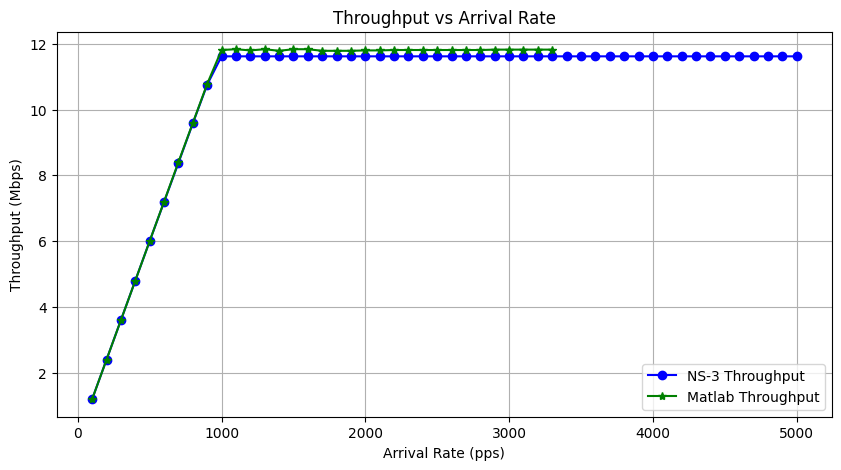

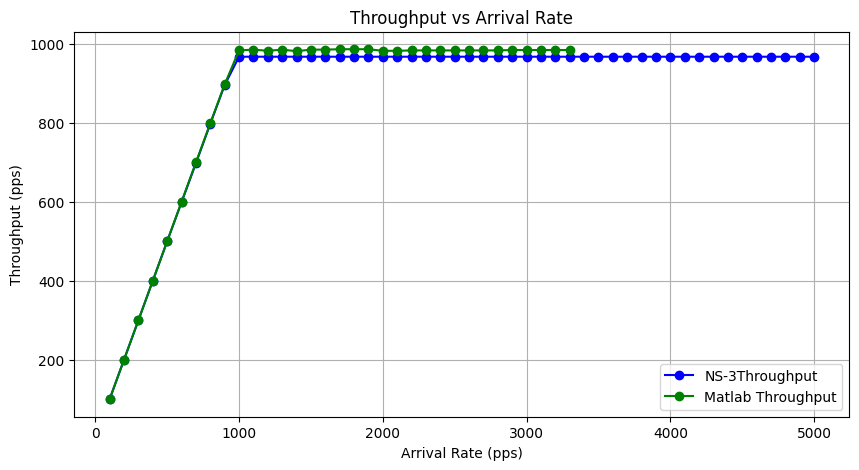

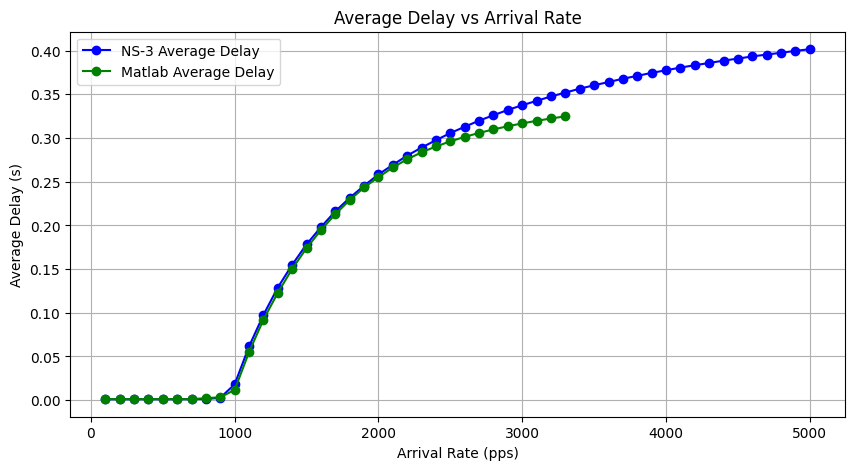

In [ ]:
# Tracer l'évolution du débit (throughput) en fonction du taux d'arrivée
# en Mbps
packet_size = 1500 # octets
plt.figure(figsize=(10, 5))
plt.plot(df_ns3["Arrival Rate (pps)"], 
         ((df_ns3["Packets Received"]/df_ns3["Simulation Duration (s)"]) * 8 * packet_size) / 1e6, 
         label="NS-3 Throughput", marker='o', color='b')
plt.plot(df_matlab["Arrival Rate (pps)"], df_matlab["Throughput"], label="Matlab Throughput", marker='o', color='g')
plt.plot(df_iperf["Arrival Rate (pps)"], df_iperf["Throughput"], label="Iperf Throughput", marker='o', color='r')

plt.xlabel("Arrival Rate (pps)")
plt.ylabel("Throughput (Mbps)")
plt.title("Throughput vs Arrival Rate")
plt.legend()
plt.grid(True)
plt.savefig("../graphs/1_flow_throughput_mbps_ns3_vs_matlab")
plt.show()

# en pps
plt.figure(figsize=(10, 5))
plt.plot(df_ns3["Arrival Rate (pps)"], df_ns3["Packets Received"]/df_ns3["Simulation Duration (s)"], label="NS-3Throughput", marker='o', color='b')
plt.plot(df_matlab["Arrival Rate (pps)"], df_matlab["Packets Received"]/df_matlab["Simulation Duration (s)"], label="Matlab Throughput", marker='o', color='g')

plt.xlabel("Arrival Rate (pps)")
plt.ylabel("Throughput (pps)")
plt.title("Throughput vs Arrival Rate")
plt.legend()
plt.grid(True)
plt.savefig("../graphs/1_flow_throughput_pps_ns3_vs_matlab")
plt.show()

# Tracer l'évolution du délai moyen en fonction du taux d'arrivée
plt.figure(figsize=(10, 5))
plt.plot(df_ns3["Arrival Rate (pps)"], df_ns3["Average Delay (s)"], label="NS-3 Average Delay", marker='o', color='b')
plt.plot(df_matlab["Arrival Rate (pps)"], df_matlab["Average Delay (s)"], label="Matlab Average Delay", marker='o', color='g')

plt.xlabel("Arrival Rate (pps)")
plt.ylabel("Average Delay (s)")
plt.title("Average Delay vs Arrival Rate")
plt.legend()
plt.grid(True)
plt.savefig("../graphs/1_flow_averageDelay_ns3_vs_matlab")
plt.show()


In [22]:
# arrival_rates_range = list(range(100, 2001, 100))

# # Tracer l'évolution des paquets envoyés, reçus et perdus en fonction du taux d'arrivée
# plt.figure(figsize=(10, 5))
# plt.plot(arrival_rates_range, df_ns3["Packets Sent"][:20], label="Packets Sent", marker='o')
# plt.plot(arrival_rates_range, df_ns3["Packets Received"][:20], label="Packets Received", marker='s')
# plt.plot(arrival_rates_range, df_ns3["Packets Lost"][:20], label="Packet Loss", marker='^')

# plt.xlabel("Taux d'Arrivée (en paquets par seconde)")
# plt.ylabel("Nombre de Paquets")
# plt.title("Évolution des paquets envoyés, reçus et perdus en fonction du taux d'arrivée")
# plt.legend()
# plt.grid(True)
# plt.savefig("../graphs/1_flow_receptionRate_02")
# plt.show()

# # Tracer l'évolution du délai moyen en fonction du taux d'arrivée
# plt.figure(figsize=(10, 5))
# plt.plot(arrival_rates_range, df_ns3["Average Delay (s)"][:20], label="Average Delay", marker='o', color='r')

# plt.xlabel("Taux d'Arrivée (en paquets par seconde)")
# plt.ylabel("Délai Moyen (s)")
# plt.title("Évolution du délai moyen en fonction du taux d'arrivée")
# plt.legend()
# plt.grid(True)
# plt.savefig("../graphs/1_flow_averageReceptionDelay_02")
# plt.show()


In [ ]:
df_iperf = pd.read_csv(metrics_folder + "../iperf_results.csv")
# Tracer l'évolution du débit (throughput) en fonction du taux d'arrivée
# en Mbps
packet_size = 1500 # octets
plt.figure(figsize=(10, 5))
# plt.plot(df_ns3["Arrival Rate (pps)"], 
#          ((df_ns3["Packets Received"]/df_ns3["Simulation Duration (s)"]) * 8 * packet_size) / 1e6, 
#          label="NS-3 Throughput", marker='o', color='b')
# plt.plot(df_matlab["Arrival Rate (pps)"], df_matlab["Throughput"], label="Matlab Throughput", marker='o', color='g')
plt.plot(df_iperf["Arrival Rate (pps)"], df_iperf["Throughput"], label="Iperf Throughput", marker='o', color='r')

plt.xlabel("Arrival Rate (pps)")
plt.ylabel("Throughput (Mbps)")
plt.title("Throughput vs Arrival Rate")
plt.legend()
plt.grid(True)
plt.savefig("../graphs/1_flow_throughput_mbps_ns3_vs_matlab")
plt.show()

# en pps
plt.figure(figsize=(10, 5))
# plt.plot(df_ns3["Arrival Rate (pps)"], df_ns3["Packets Received"]/df_ns3["Simulation Duration (s)"], label="NS-3Throughput", marker='o', color='b')
# plt.plot(df_matlab["Arrival Rate (pps)"], df_matlab["Packets Received"]/df_matlab["Simulation Duration (s)"], label="Matlab Throughput", marker='o', color='g')
plt.plot(df_iperf["Arrival Rate (pps)"], df_iperf["Packets Received"]/df_iperf["Simulation Duration (s)"], label="Iperf Throughput", marker='o', color='g')

plt.xlabel("Arrival Rate (pps)")
plt.ylabel("Throughput (pps)")
plt.title("Throughput vs Arrival Rate")
plt.legend()
plt.grid(True)
plt.savefig("../graphs/1_flow_throughput_pps_ns3_vs_matlab")
plt.show()

# Tracer l'évolution du délai moyen en fonction du taux d'arrivée
plt.figure(figsize=(10, 5))
plt.plot(df_ns3["Arrival Rate (pps)"], df_ns3["Average Delay (s)"], label="NS-3 Average Delay", marker='o', color='b')
plt.plot(df_matlab["Arrival Rate (pps)"], df_matlab["Average Delay (s)"], label="Matlab Average Delay", marker='o', color='g')

plt.xlabel("Arrival Rate (pps)")
plt.ylabel("Average Delay (s)")
plt.title("Average Delay vs Arrival Rate")
plt.legend()
plt.grid(True)
plt.savefig("../graphs/1_flow_averageDelay_ns3_vs_matlab")
plt.show()


(65, 7)